### SKJHA Comcast Complaints Project Submission:
    
### Key Questions:
1a and 1b. Import data into chart for the number of complaints at monthly and daily granularity levels.

2. Provide a table with the frequency of complaint types. 

2a. Which complaint types are maximum i.e., around internet, network issues, or across any   other domains.

3. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

4.  Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. 
    Provide insights on:

4a. Which state has the maximum complaints.

4b. Which state has the highest percentage of unresolved complaints

5. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

### Insights

1. Maximum Daily Complaints Received: A total of 218 complaints were received on June 24, 2015 (maximum complaints)
2. Maximum Monthly Complaints Received: A total of 1046 complaints were received in June, 2015
3. Category which had maximum complaints: A total of 1598 customer complaint types were related to billing
4. Provide state wise status of complaints in a stacked bar chart. 
5. Florida had the maximum number of complaints (closed and open) in Q3 2015 (30)
6. Utah had the highest percentage of unresolved complaints in Q3 2015 (50%)
7. The total percentage of resolved complaints received through phone calls were 50.6%
8. The total percentage of resolved complaints received via internet were 49.4%%

In [22]:
# General sites referenced for coding and syntax related queries:

# www.stackoverflow.com
# www.medium.com
# https://datavizpyr.com/time-series-plot-or-line-plot-with-pandas/
# https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels
# https://medium.com/@yangdustin5/quick-guide-to-pandas-pivot-table-crosstab-40798b33e367


# Step 1: Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 2: Import the Comcast Complaints Data File, read it and create a dataframe

date_columns = ['Date', "Date_month_year"]
comcast_data = pd.read_csv('Comcast_telecom_complaints_data.csv', parse_dates = date_columns)

In [4]:
# Step 3: Check the data to ensure that there are no null values, check data types

comcast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(8)
m

In [5]:
# Step 4: Explore the data with describe() and head() functions

comcast_data.describe()
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


### Insight for Question 1a: Trend Chart for Daily Complaints
### The maximum daily complaints received were on June 24, 2015 (total of 218 complaints received)

In [6]:
# Insight Generation for Question 1:
# Step 1: Import data into chart for the number of complaints at monthly and daily granularity levels.

# Create new columns for month and year, day-year-month, and Quarter

comcast_data['month_year'] = pd.to_datetime(comcast_data['Date_month_year']).dt.to_period('M')
comcast_data['day_month_year'] = pd.to_datetime(comcast_data['Date_month_year']).dt.to_period('D')
comcast_data['Quarter'] = pd.to_datetime(comcast_data['Date_month_year']).dt.to_period('Q')
comcast_data.head()



,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month_year,day_month_year,Quarter
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04,2015-04-22,2015Q2
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08,2015-08-04,2015Q3
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04,2015-04-18,2015Q2
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07,2015-07-05,2015Q3
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05,2015-05-26,2015Q2


In [7]:
# Question 1a: 
# Import data into chart for the number of complaints at daily granularity levels.
# Daily Complaints Table sorted in a decsending order
# Insight 1: The maximum complaints received in any given day are 218 (Table below)

daily_data = comcast_data.groupby('day_month_year')['day_month_year'].count().to_frame(name = "Number of Complaints")
daily_data_df = daily_data.reset_index()
daily_data_df.sort_values('Number of Complaints', ascending = False)

,day_month_year,Number of Complaints
66,2015-06-24,218
65,2015-06-23,190
67,2015-06-25,98
68,2015-06-26,55
72,2015-06-30,53
...,...,...
89,2015-12-05,7
44,2015-05-24,7
30,2015-05-04,6
7,2015-03-05,5


Text(0.5, 1.0, 'Daily Trend - Number of Complaints Received')

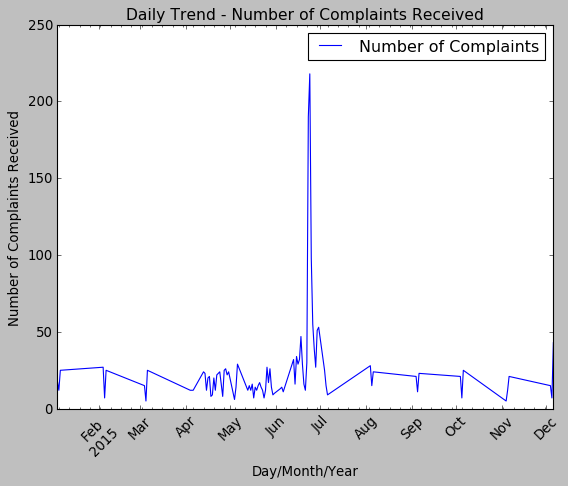

In [45]:
# Question 1a contd: Creating the chart view of the number of daily complaints

# Insight 1: The maximum complaints received in any given day are 218 (Chart view given below)

daily_data_df.plot(x= 'day_month_year', y = 'Number of Complaints',rot = 45)
plt.ylabel('Number of Complaints Received', size = 12)
plt.xlabel('Day/Month/Year', size = 12)
plt.title('Daily Trend - Number of Complaints Received', size = 14)



### Insight for Question 1b: Trend Chart for Monthly Complaints
### The maximum complaints were received in June (total of 1046 complaints)

In [9]:
# Question 1b: 
# Import data into chart for the number of complaints at monthly granularity levels.
# Monthly  Complaints Table sorted in a decsending order
# Insight 1: The maximum complaints received in any given month are 1046 (Table below)

monthly_data = comcast_data.groupby(['month_year'])['month_year'].count().to_frame(name = 'Number of Complaints')
monthly_data_df = monthly_data.reset_index()
monthly_data_df.sort_values('Number of Complaints', ascending = False)



,month_year,Number of Complaints
5,2015-06,1046
3,2015-04,375
4,2015-05,317
7,2015-08,67
11,2015-12,65
1,2015-02,59
0,2015-01,55
8,2015-09,55
9,2015-10,53
6,2015-07,49


Text(0.5, 1.0, 'Monthly Trend - Number of Complaints Received')

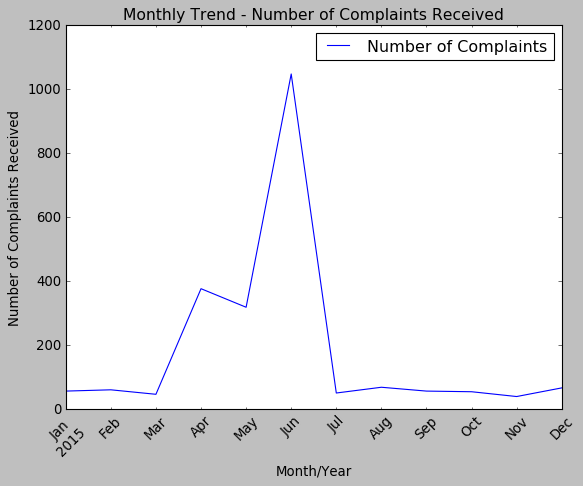

In [46]:
# Question 1b contd: 
# Import data into chart for the number of complaints at monthly granularity levels.
# Monthly Complaints Chart view
# Insight 1: The maximum complaints received in any given month are 1046 (Chart below)

monthly_data_df.plot(x= 'month_year', y = 'Number of Complaints',rot = 45)
plt.ylabel('Number of Complaints Received', size = 12)
plt.xlabel('Month/Year', size = 12)
plt.title('Monthly Trend - Number of Complaints Received', size = 14)



### Insight for Question 2a and b: Which complaint types are maximum (provided table and analysis)
### The maximum customer complaint types were related to billing (1598)

In [23]:
# Insight Generation for Question 2: Provide a table with the frequency of complaint types.
# 2a. Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

# Step 1: Created a list of keywords to search for in the Customer Complaint Column
# Step 2: For loop - to go thorugh the list and if the word in the list exists in the Customer Complaint Column
# Step 2 contd: then that keyword in cpatured the new column "Type"

for item in ["Internet","Payment","Network","Speed","Speeds","Usage", "Billing","internet","payment","network","speed","speeds","usage", "billing"]:
    comcast_data["Type"][comcast_data['Customer Complaint'].str.contains(item)] = item


# Step 3: Rename the keywords (lowercase replaced by Capitalized word) to combine all values for that word

comcast_data['Type'].replace({'internet': 'Internet', 'payment': 'Payment', 
                               'network': 'Network', 'speed': 'Speed', 
                              'speeds': 'Speed', 'Speeds': 'Speed','usage': 'Usage', 'billing': 'Billing'}, inplace = True)
    
comcast_data
comcast_data.groupby(['Type'])['Type'].count().to_frame('Number').reset_index()

# INSIGHT - The maximum customer complaint types were related to billing (1598)

,Type,Number
0,Billing,1598
1,Internet,388
2,Network,1
3,Payment,12
4,Speed,181
5,Usage,44


### Question 3: Create a new categorical variable with value as Open and Closed.
### Open & Pending is to be categorized as Open
### Closed & Solved is to be categorized as Closed.

In [24]:
# Insight Generation for Question 3:

# Step 1: Create a new dataframe which contains only selected columns

status_data = comcast_data[['Quarter','Received Via', 'City', 'State', 'Zip code', 'Status']]


In [25]:
# Step 2: Create a new column which labels 'Closed' and 'Solved' values as 'Closed' and 
# 'Open' and 'Pending' as 'Open'

# Create a list of conditions and list of values for those conditions
# Use these to check if column values meet that condition and generate a new column with the new values

conditions = [(status_data['Status'] == 'Closed'), (status_data['Status'] == 'Solved'),
             (status_data['Status'] == 'Open'), (status_data['Status'] == 'Pending')]
values = ['CLOSED', 'CLOSED', 'OPEN', 'OPEN']
status_data['New_Status'] = np.select(conditions, values)
status_data

,Quarter,Received Via,City,State,Zip code,Status,New_Status
0,2015Q2,Customer Care Call,Abingdon,Maryland,21009,Closed,CLOSED
1,2015Q3,Internet,Acworth,Georgia,30102,Closed,CLOSED
2,2015Q2,Internet,Acworth,Georgia,30101,Closed,CLOSED
3,2015Q3,Internet,Acworth,Georgia,30101,Open,OPEN
4,2015Q2,Internet,Acworth,Georgia,30101,Solved,CLOSED
...,...,...,...,...,...,...,...
2219,2015Q1,Customer Care Call,Youngstown,Florida,32466,Closed,CLOSED
2220,2015Q1,Customer Care Call,Ypsilanti,Michigan,48197,Solved,CLOSED
2221,2015Q3,Internet,Ypsilanti,Michigan,48197,Solved,CLOSED
2222,2015Q2,Customer Care Call,Ypsilanti,Michigan,48197,Solved,CLOSED


### Question 4: Provide state wise status of complaints in a stacked bar chart. 
### Use the categorized variable from Q3. Provide insights on:
### 4a. Which state has the maximum complaints.
### 4b. Which state has the highest percentage of unresolved complaints
### Insight for 4a: Florida had the maximum number of complaints (closed and open) in Q3 2015 (30)
### Insight for 4b: Utah had the highest percentage of unresolved complaints in Q3 2015 (50%)

In [27]:
# Insight generation for 4a:
# Step 1: Grouping by State to get the total number of tickets by State New_Status by State
# Step 2 Merging two rows to capture all data for District of Columbia in one row

status_data['State'].replace({'District Of Columbia': 'District of Columbia'}, inplace = True)

# Step 3: Group the data by State and Quarter 

state_quarter_data = pd.crosstab(index=[status_data['State'], status_data['Quarter']], columns= status_data['New_Status'])
state_q3_data  = state_quarter_data.reset_index()

# Step 4: Select only the Q3 2015 values for all States

Q3_df = state_q3_data.loc[state_q3_data['Quarter'] == '2015Q3']
Q3_df["total_complaints"] = Q3_df["CLOSED"] + Q3_df["OPEN"]
Q3_df

New_Status,State,Quarter,CLOSED,OPEN,total_complaints
2,Alabama,2015Q3,2,0,2
9,California,2015Q3,15,1,16
13,Colorado,2015Q3,7,0,7
16,Connecticut,2015Q3,2,0,2
25,Florida,2015Q3,26,4,30
29,Georgia,2015Q3,19,2,21
33,Illinois,2015Q3,20,0,20
37,Indiana,2015Q3,4,0,4
46,Maryland,2015Q3,5,1,6
50,Massachusetts,2015Q3,6,1,7


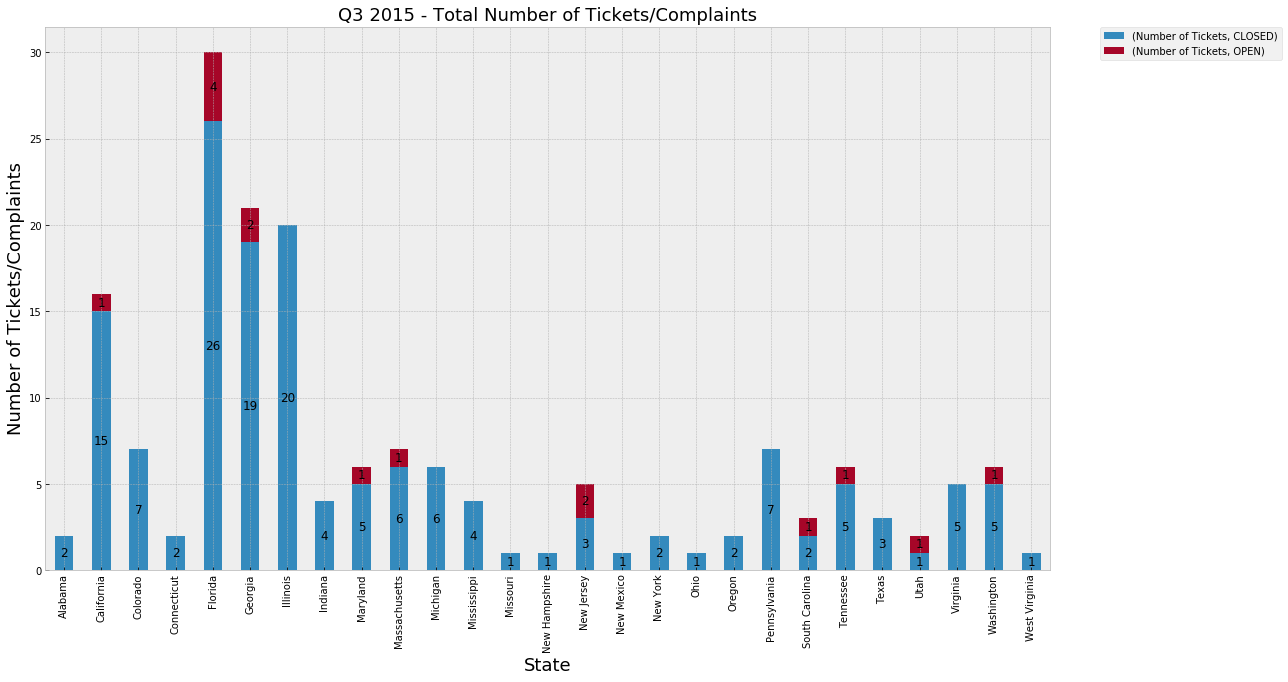

In [28]:
# Stacked Bar Plot
# Referred to these website for questions and coding queries: 
# https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels
# https://medium.com/@yangdustin5/quick-guide-to-pandas-pivot-table-crosstab-40798b33e367

state_status_data = status_data.groupby(['State', 'Quarter','New_Status'])['New_Status'].count().to_frame('Number of Tickets')
final_state_data = state_status_data.reset_index()
final_state_data

# Q3 values only
q3_state_data = final_state_data.loc[final_state_data['Quarter'] == '2015Q3']
q3_state_data

# Creating a pivot table to get the closed and Open tickets by State
df1 = q3_state_data.pivot(columns = 'New_Status',index = 'State')
df1

# Plot the Stacked Bar Chart
plt.style.use('bmh')
ax_1 = df1.plot(kind = 'bar',figsize=(18,10), stacked = True,legend = True)
plt.ylabel('Number of Tickets/Complaints', size = 18)
plt.xlabel('State', size = 18)
plt.title('Q3 2015 - Total Number of Tickets/Complaints', size = 18)
plt.legend(bbox_to_anchor=(1.0, 1.0), title='Ticket Status')

# .patches is everything inside of the chart
for rect in ax_1.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()    
    # The height of the bar data value is used as the label
    label_text = f'{height:.0f}'  # f'{height:.0f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # Plot only when height is greater than specified value
    if height > 0:
        ax_1.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)
    
ax_1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  

plt.show()

In [29]:
# Insight generation for highest percentage of unresolved complaints by State

# Calculate total number of complaints

total  = Q3_df["CLOSED"] + Q3_df["OPEN"]

# Normalize the values

closed_percent  = Q3_df['CLOSED']/total*100
open_percent  = Q3_df['OPEN']/total*100

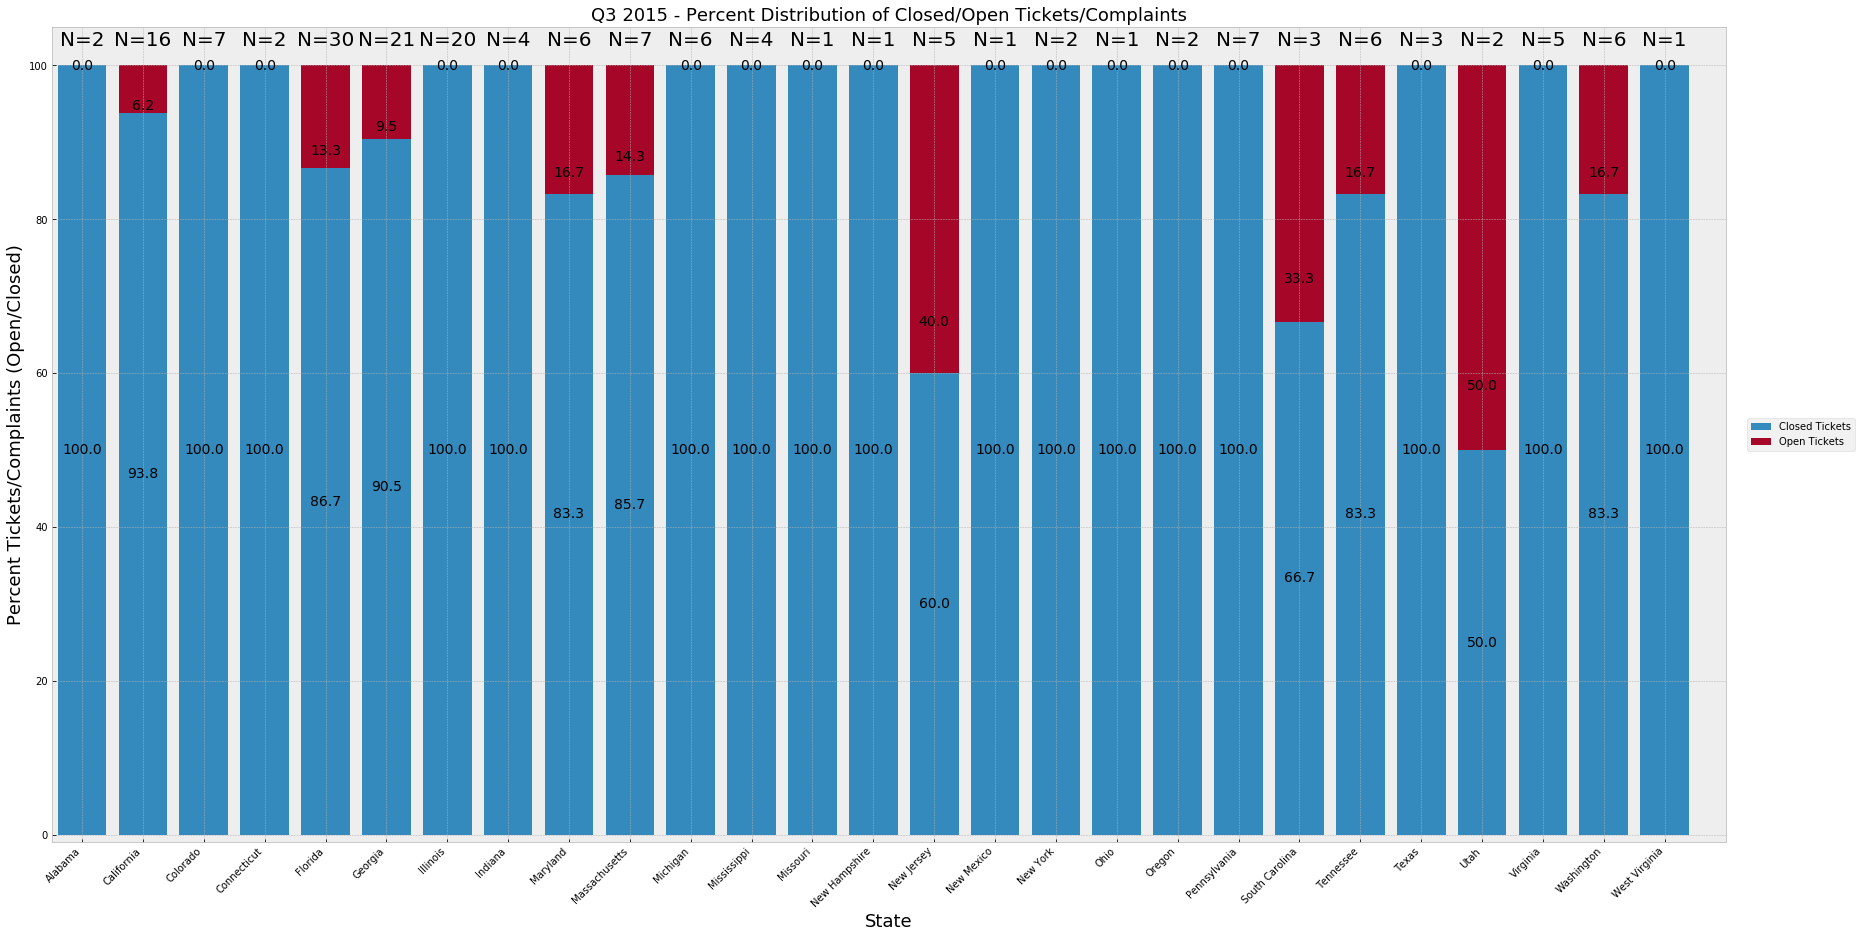

In [39]:
# Stacked Bar Plot for Percentage Distribution of Open and Closed Complaints

# Figure size and plot style

plt.figure(figsize=(30,15))
plt.style.use('bmh')

# Set bar width of 1
bar_width = 1

# Create positions of the left bar-boundaries
bar_l = [i for i in range(len(Q3_df['CLOSED']))]

# Positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

# Create tack bars
plt.bar(Q3_df["State"], closed_percent, label='Closed Tickets')
plt.bar(Q3_df["State"], open_percent ,bottom = closed_percent,label='Open Tickets')


# Added text annotation corresponding to the percentage of each data

for xposi, yposi, yvalue in zip(Q3_df["State"], closed_percent/2, closed_percent):
    plt.text(xposi, yposi, "%.1f"%yvalue, ha="center", va="center", size = 14)
for xposi, yposi, yvalue in zip(Q3_df["State"], closed_percent + open_percent/6, open_percent):
    plt.text(xposi, yposi, "%.1f"%yvalue, ha="center", va="center", size = 14)

# Added text annotation corresponding to the "total" value of each bar

for xposi, yposi, yvalue in zip(Q3_df["State"], closed_percent + open_percent + 2, total):
    plt.text(xposi, yposi, "N=%d"%yvalue, ha="center", va="bottom", size = 20)

plt.ylim(-1,105)
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width/2])
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Percent Tickets/Complaints (Open/Closed)', size = 18)
plt.xlabel('State', size = 18)
plt.title('Q3 2015 - Percent Distribution of Closed/Open Tickets/Complaints', size = 18)

plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')


### Question 5: Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
### Inisght 1: The total percentage of resolved complaints received through phone calls were 50.6%
### Inisght 2: The total percentage of resolved complaints received via internet were 49.4%%

In [40]:
# Step 1: Grouping by State and by Complaint Status(Open/Closed)

state_total_complaints = pd.crosstab(index = [status_data['State'], status_data['New_Status']], columns= status_data['Received Via'])
state_complaints_total = state_total_complaints.reset_index()

# Selecting only the Closed Complaints data
resolved_complaints = state_complaints_total.loc[state_complaints_total['New_Status'] == 'CLOSED']
resolved_complaints

Received Via,State,New_Status,Customer Care Call,Internet
0,Alabama,CLOSED,7,10
2,Arizona,CLOSED,5,9
4,Arkansas,CLOSED,3,3
5,California,CLOSED,83,76
7,Colorado,CLOSED,34,24
9,Connecticut,CLOSED,3,6
11,Delaware,CLOSED,1,7
13,District of Columbia,CLOSED,9,6
15,Florida,CLOSED,105,96
17,Georgia,CLOSED,96,112


In [41]:
# Step 2: Combine all the State Open data in one row and State Closed Data into second row.

total_complaints = pd.crosstab(index = [status_data['New_Status']], columns= status_data['Received Via'])
complaints_total = total_complaints.reset_index()
complaints_total
                                              

Received Via,New_Status,Customer Care Call,Internet
0,CLOSED,864,843
1,OPEN,255,262


In [42]:
# Step 3: Select only the data for the closed complaints

total_resolved_complaints = complaints_total.loc[complaints_total['New_Status'] == 'CLOSED']
total_resolved_complaints

Received Via,New_Status,Customer Care Call,Internet
0,CLOSED,864,843


In [43]:
# Step 4:
# Calculate total number of complaints by Internet and Calls
total_resolved_combined  = total_resolved_complaints["Customer Care Call"] + total_resolved_complaints["Internet"]

# Normalize the values
call_percent_combined  = total_resolved_complaints['Customer Care Call']/total_resolved_combined *100
internet_percent_combined  = total_resolved_complaints['Internet']/total_resolved_combined *100

0    50.615114
dtype: float64


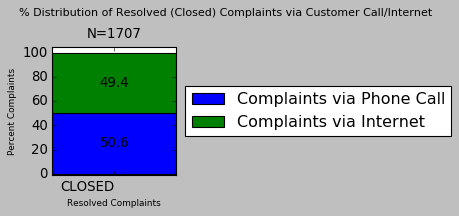

In [59]:
#Step 5: Plot the percent distribution of closed complaints made via phone call or internet
# Reference: https://dfrieds.com/data-visualizations/style-plots-python-matplotlib.html

plt.figure(figsize=(2,2))

plt.style.use('classic')

# Setting bar width of 20

bar_width = 20

# Creating stack bars

plt.bar(total_resolved_complaints["New_Status"], call_percent_combined, label='Complaints via Phone Call')

plt.bar(total_resolved_complaints["New_Status"], internet_percent_combined, bottom = call_percent_combined,label='Complaints via Internet')


# Adding text annotation corresponding to the percentage of each data.

for xposi, yposi, yvalue in zip(total_resolved_complaints['New_Status'], call_percent_combined/2, call_percent_combined):
    print(call_percent_combined)
    plt.text(xposi, yposi, "%.1f"%yvalue, ha="center", va="center")

for xposi, yposi, yvalue in zip(total_resolved_complaints['New_Status'], call_percent_combined + internet_percent_combined/2, internet_percent_combined):
    plt.text(xposi, yposi, "%.1f"%yvalue, ha="center", va="center")

# Adding text annotation corresponding to the "total" value of each bar

for xposi, yposi, yvalue in zip(total_resolved_complaints['New_Status'], call_percent_combined + internet_percent_combined + 10, total_resolved_combined):
    plt.text(xposi, yposi, "N=%d"%yvalue, ha="center", va="bottom")

# Setting the Y-axis to expland byond 0 and 100 

plt.ylim(-1,105)

# Setting the rotation of the X-tick labels
plt.setp(plt.gca().get_xticklabels(), rotation=0, horizontalalignment='right')
plt.ylabel('Percent Complaints', size = 8)
plt.xlabel('Resolved Complaints', size = 8)
plt.title('% Distribution of Resolved (Closed) Complaints via Customer Call/Internet', size = 10, x = 1.4, y=1.2)
plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
